In [4]:
# imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # turning off warning, default='warn'
import matplotlib.pyplot as plt

In [5]:
# load data
df = pd.read_csv("tech-purchase.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Tasks

## 1. Cleaning

Questions: 

    • How many rows have null values (if there is a null value, that’s also counted)?
    
Answer : 545
    
    • How many orders have been made (not including nulls)?
    
Answer : 186850 - 545 = 186305

Tasks:

    a) Show all of the null containing rows

In [6]:
# code
rows = df.isnull().any(axis=1)  # if at least one value in the row is NaN, then it becomes True
rows

0         False
1          True
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [7]:
df[rows]   # display only rows with null(s)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


b) Drop rows that contain any null values

In [8]:
df = df[rows == False]  # all rows with null(s) are dropped
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## 2. Restructuring the dataset.

Tasks:

    a) Using our (cleaned) dataset, create a new column that would contain only the months from the Order Date column.

In [9]:
# code
# Order Date has a format of mm/dd/yy
df["Order Date"].str[:2]   # extract months

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Order Date, Length: 186305, dtype: object

In [10]:
df["Order Month"] = df["Order Date"].str[:2]    #   just ignore possible "SettingWithCopyWarning"
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


b) Convert the month numbers into characters (f.e: 1 into January, 2 into February, and so on).

In [11]:
# if you run it, you get interesting error, that there are rows with 'Order Date' string instead of some date
# And as it is not NaN or null, pandas did not recognize it like null
# I am not sure, should i drop these rows (i think it is actually nulls and i should drop them) or remain;
# but let`s drop these rows

mapping = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', 
           '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December',}

#df["Order Month"] = df["Order Month"].apply(lambda x: mapping[x]) # uncomment then run to see error msg
#df

In [12]:
df[df["Order Month"] == 'Or']   # Here are all rows with 'Order Date' string instead of some date

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [13]:
df.drop(df[df["Order Month"] == 'Or'].index, inplace=True)
df[df["Order Month"] == 'Or']  # no more invalid data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month


In [14]:
mapping = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', 
           '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December',}

df["Order Month"] = df["Order Month"].apply(lambda x: mapping[x])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September


c) Create a new column that would contain only the state names taken from the Purchase Address column.

In [15]:
# code
df["Purchase Address"].str.split().str[-2]    # extract states

0         TX
2         MA
3         CA
4         CA
5         CA
          ..
186845    CA
186846    CA
186847    CA
186848    CA
186849    CA
Name: Purchase Address, Length: 185950, dtype: object

In [16]:
df["State"] = df["Purchase Address"].str.split().str[-2]   # just ignore possible "SettingWithCopyWarning"
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,CA
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,CA
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,CA
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,CA


d) Convert the Quantity Ordered column’s values into an integer type and the Price Each column’s values into a floating type.

In [17]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(dtype=int, copy=True)
df["Quantity Ordered"]

0         2
2         1
3         1
4         1
5         1
         ..
186845    3
186846    1
186847    1
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int64

In [18]:
df["Price Each"] = df["Price Each"].astype(dtype=float, copy=True)
df["Price Each"]

0          11.95
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      2.99
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Price Each, Length: 185950, dtype: float64

## 3. Get the useful information.

     Questions:
    1. Which month has the highest number of sales (in amounts)? And how much was that?
    2. Plot a bar plot that would represent the sales info for each month.
    3. Which state has ordered the least and which the highest?
    4. At what time of the day the highest amount of money is spent on sales?

In [19]:
# 1
df[df["Quantity Ordered"] == df["Quantity Ordered"].max()]    # 9 is the highest amount;
                                                # 3 orders at the same time in July and June

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State
81010,226483,AAA Batteries (4-pack),9,2.99,07/20/19 23:28,"867 Sunset St, San Francisco, CA 94016",July,CA
81646,227096,AAA Batteries (4-pack),9,2.99,07/29/19 09:50,"60 10th St, San Francisco, CA 94016",July,CA
92877,211097,AAA Batteries (4-pack),9,2.99,06/23/19 08:29,"338 Hickory St, Los Angeles, CA 90001",June,CA


In [20]:
# 2
each_month = pd.pivot_table(df, values='Quantity Ordered', index='Order Month', aggfunc=np.sum)
each_month

,Quantity Ordered
Order Month,
April,20558
August,13448
December,28114
February,13449
January,10903
July,16072
June,15253
March,17005
May,18667


<AxesSubplot:xlabel='Order Month'>

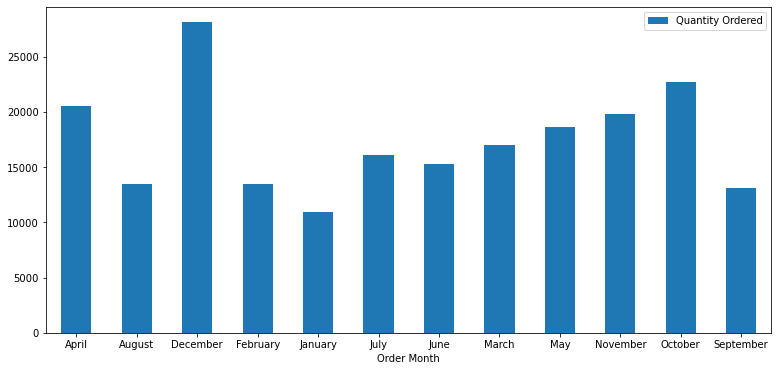

In [21]:
# plot
each_month.plot.bar(rot=0, figsize=(13, 6))

In [22]:
# 3
df[df["Quantity Ordered"] == df["Quantity Ordered"].min()]["State"].unique()  # list of states with the lowest
                                                                # the lowest is 1
    # the hiest is taken from "1" ex., this State is CA, the hieghest order is equal to 9 

array(['MA', 'CA', 'WA', 'GA', 'TX', 'NY', 'OR', 'ME'], dtype=object)

In [24]:
# 4
# divide order date into parts of the day
time = df["Order Date"].str.split().str[-1]
time

0         08:46
2         22:30
3         14:38
4         14:38
5         09:27
          ...  
186845    20:56
186846    16:00
186847    07:39
186848    17:30
186849    00:18
Name: Order Date, Length: 185950, dtype: object

In [25]:
def mapping_fun(sample):
    h, m = int(sample[:2]), int(sample[3:])   # hours and minutes
    if h >= 6 and h < 12:
        return "morning"
    elif h >= 12 and h < 17:
        return "afternoon"
    elif h >= 17 and h < 21:
        return "evening"
    else:
        return "night"

time = time.apply(lambda x: mapping_fun(x))
time.unique()

array(['morning', 'night', 'afternoon', 'evening'], dtype=object)

In [26]:
df["Order Time"] = time
df["Spent Money"] = df["Quantity Ordered"] * df["Price Each"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,State,Order Time,Spent Money
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,TX,morning,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,MA,night,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA,afternoon,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,CA,afternoon,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,CA,morning,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",September,CA,evening,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",September,CA,afternoon,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",September,CA,morning,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",September,CA,evening,379.99


In [29]:
# On average at the evening it is spent the most
pd.pivot_table(df, values='Spent Money', index='Order Time')

,Spent Money
Order Time,
afternoon,184.895479
evening,187.186717
morning,184.367334
night,185.544743


In [30]:
# If we consider only max numbers, then afternoon, morning and night have the same max result 3400
pd.pivot_table(df, values='Spent Money', index='Order Time', aggfunc=np.max)

,Spent Money
Order Time,
afternoon,3400.00
evening,1999.98
morning,3400.00
night,3400.00


# 4. Time to plot.

Tasks:

    1. Plot the bar chart that represents different items bought on the x-axis and how many of them were sold on the y-axis.



In [31]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [32]:
sold_sum = pd.pivot_table(df, values='Quantity Ordered', index='Product', aggfunc=np.sum)
sold_sum

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


<AxesSubplot:xlabel='Product'>

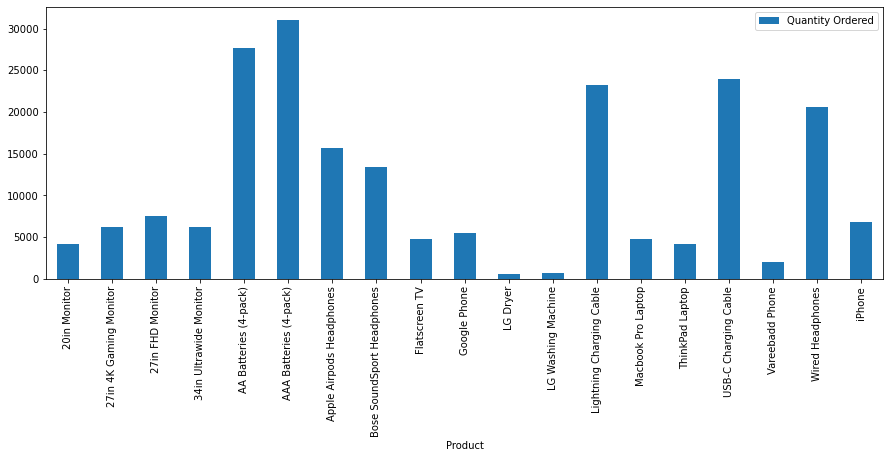

In [33]:
sold_sum.plot.bar(figsize=(15, 5))

2. Plot a pie char that represents each month as the piece of the pie, showing how much sales are generally done.

In [34]:
month_sale = pd.pivot_table(df, values='Quantity Ordered', index='Order Month', aggfunc=np.sum)
month_sale

,Quantity Ordered
Order Month,
April,20558
August,13448
December,28114
February,13449
January,10903
July,16072
June,15253
March,17005
May,18667


<AxesSubplot:ylabel='Quantity Ordered'>

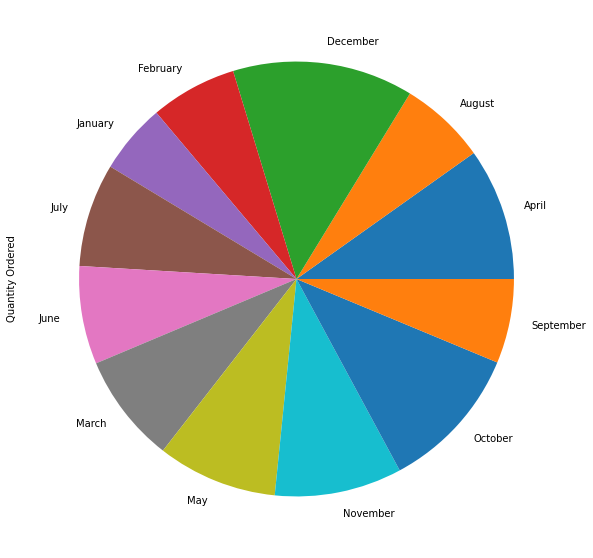

In [35]:
month_sale.plot.pie(x='Order Month', y='Quantity Ordered', figsize=(10, 10), legend=False)

# 5. More info with the plots.

Tasks:

    1. Prove the answer to the question four in the third part (Get the useful information).

In [36]:
# On average at the evening it is spent the most
avg_sales = pd.pivot_table(df, values='Spent Money', index='Order Time')
avg_sales

,Spent Money
Order Time,
afternoon,184.895479
evening,187.186717
morning,184.367334
night,185.544743


<AxesSubplot:ylabel='Spent Money'>

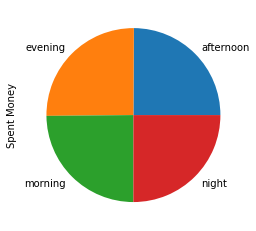

In [37]:
# almost equal, but from avg_sales we know that evening is the max value
avg_sales.plot.pie(x='Order Time', y='Spent Money', legend=False)

In [38]:
# If we consider only max numbers, then afternoon, morning and night have the same max result 3400
max_sales = pd.pivot_table(df, values='Spent Money', index='Order Time', aggfunc=np.max)
max_sales

,Spent Money
Order Time,
afternoon,3400.00
evening,1999.98
morning,3400.00
night,3400.00


<AxesSubplot:ylabel='Spent Money'>

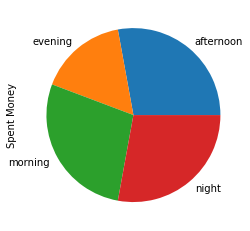

In [39]:
max_sales.plot.pie(x='Order Time', y='Spent Money', legend=False)

2. Referring to the question 1 of the 4th part (Time to plot), plot that bar chart again but with adding a line chart inside onto it representing the price of each item.

In [40]:
# price of each product
prices = pd.pivot_table(df, values='Price Each', index='Product')
prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


<AxesSubplot:xlabel='Product'>

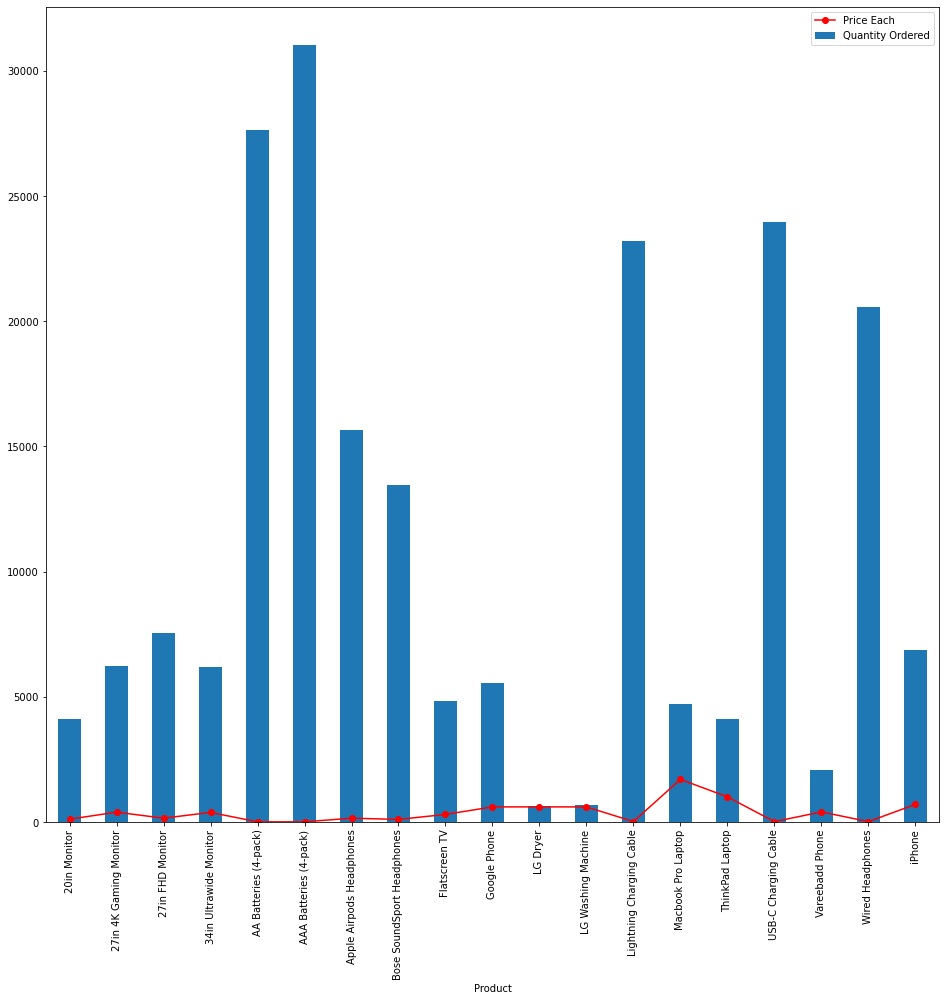

In [41]:
# Unfortinutely, as Quantity has pretty high values, prices are barely visible
ax = prices.plot(linestyle='-', marker='o', color='red')
sold_sum.plot.bar(figsize=(16, 15), ax=ax)